In [186]:
from scipy.stats import entropy
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles 
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
from plot import *
import importlib
from findWellPosGenes import *
importlib.reload(sys.modules['plot'])
importlib.reload(sys.modules['findWellPosGenes'])
from plot import *
from findWellPosGenes import *

In [2]:
###to calculate and plot peaks for individual kmers from the signal distributions
kmerpeaks = {}
for line in open('../data/uncalled_eventalign/220308_ang_500_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)
for line in open('../data/uncalled_eventalign/220308_ang_0_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)

GTATCC
1 1


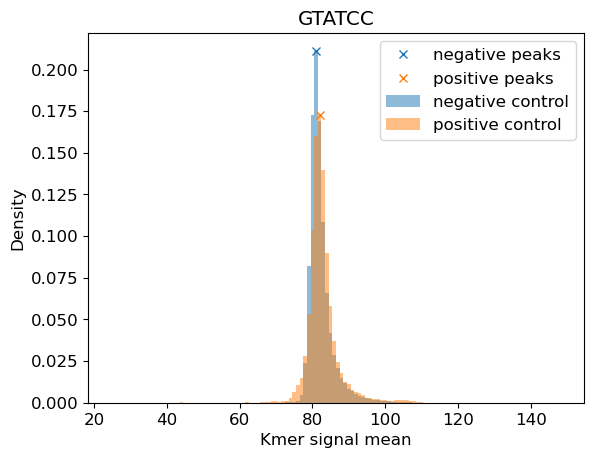

In [4]:
for kmer in ['GTATCC']:
    print(kmer)
    pos, neg = kmerpeaks[kmer]
    pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
    negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
    print(len(pospeaks), len(negpeaks))
    plt.figure()
    plt.bar(range(25,149), neg, width=1, label="negative control", alpha=0.5)
    plt.bar(range(25, 149), pos, width=1, label="positive control", alpha=0.5)
    plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks')
    plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks')
    plt.xlabel('Kmer signal mean')
    plt.ylabel('Density')
    plt.title(kmer)
    plt.legend()
    plt.savefig("../figures/Figure_revision_500_angelicin_ctrl_sig_dist_" + kmer + "_withpeaks.pdf", dpi=600)

## missing k-mer analysis

In [9]:
genome = {}
last = None
for line in open('../../Add-seq/data/ref/sacCer3.fa'):
    if line[0] == '>':
        last = line[1:].rstrip()
        genome[last] = ''
    else: genome[last] += line.rstrip()
print('loaded genome')

loaded genome


In [7]:
negcollapsefile = '../../Add-seq/data/ctrl/pod5/nanocompore/220308_ang_0_eventalign_collapse.tsv'
poscollapsefile = '../../Add-seq/data/ctrl/pod5/nanocompore/220308_ang_500_eventalign_collapse.tsv'

In [10]:
kmerToMeds, kmerToMissing = {}, {}
allmeds = []
last = None
lastkmer = None
readname, chr = None, None

for line in open(poscollapsefile):
    if line[0] == '#':
        last = None
        # print(line)
        if len(line.split()) == 2:
            readname, chr = line[1:].rstrip().split()
        continue
    line = line.rstrip().split('\t')
    if line[0] == 'ref_pos': continue
    kmer = line[1]
    if kmer not in kmerToMeds:
        kmerToMeds[kmer] = []
        # [missed occurance, total occurance]
        kmerToMissing[kmer] = [0,0]
    median = float(line[-2])
    refpos = int(line[0])
    
    if last and last != refpos-1:
        for i in range(last+1, refpos):
            missedkmer = genome[chr][i:i+6]
            if missedkmer not in kmerToMissing: kmerToMissing[missedkmer] = [0,0]
            kmerToMissing[missedkmer][0] += 1
            kmerToMissing[missedkmer][1] += 1
    last = refpos
    lastkmer = kmer
    kmerToMissing[kmer][1] += 1
    kmerToMeds[kmer].append(median)

outmissing = open('../../Add-seq/data/ctrl/pod5/nanocompore/220308_ang_500_eventalign_nanocompore_collapse_missingbykmer.tsv', 'w')
for kmer in kmerToMissing:
    fracmissing = kmerToMissing[kmer][0]/kmerToMissing[kmer][1]
    outmissing.write('\t'.join([str(x) for x in [kmer, kmerToMissing[kmer][0], kmerToMissing[kmer][1], fracmissing]]) + '\n')

In [11]:
kmerToMeds, kmerToMissing = {}, {}
allmeds = []
last = None
lastkmer = None
readname, chr = None, None

for line in open(negcollapsefile):
    if line[0] == '#':
        last = None
        # print(line)
        if len(line.split()) == 2:
            readname, chr = line[1:].rstrip().split()
        continue
    line = line.rstrip().split('\t')
    if line[0] == 'ref_pos': continue
    kmer = line[1]
    if kmer not in kmerToMeds:
        kmerToMeds[kmer] = []
        # [missed occurance, total occurance]
        kmerToMissing[kmer] = [0,0]
    median = float(line[-2])
    refpos = int(line[0])
    
    if last and last != refpos-1:
        for i in range(last+1, refpos):
            missedkmer = genome[chr][i:i+6]
            if missedkmer not in kmerToMissing: kmerToMissing[missedkmer] = [0,0]
            kmerToMissing[missedkmer][0] += 1
            kmerToMissing[missedkmer][1] += 1
    last = refpos
    lastkmer = kmer
    kmerToMissing[kmer][1] += 1
    kmerToMeds[kmer].append(median)

outmissing = open('../../Add-seq/data/ctrl/pod5/nanocompore/220308_ang_0_eventalign_nanocompore_collapse_missingbykmer.tsv', 'w')
for kmer in kmerToMissing:
    fracmissing = kmerToMissing[kmer][0]/kmerToMissing[kmer][1]
    outmissing.write('\t'.join([str(x) for x in [kmer, kmerToMissing[kmer][0], kmerToMissing[kmer][1], fracmissing]]) + '\n')
outmissing.close()

In [25]:
kmerToSampleToMissing = {}
bins = np.arange(0,200,0.1)
states = ['0', '500']
for ang in states:
    for line in open('../../Add-seq/data/ctrl/pod5/nanocompore/220308_ang_' + ang + '_eventalign_nanocompore_collapse_missingbykmer.tsv'):
        line = line.rstrip().split('\t')
        kmer = line[0]
        fracmissing = float(line[-1])
        if kmer not in kmerToSampleToMissing: kmerToSampleToMissing[kmer] = {}
        kmerToSampleToMissing[kmer][ang] = fracmissing
    print('loaded', ang)

loaded 0
loaded 500


In [16]:
informative_kmers = []
with open('../data/uncalled_eventalign/5_500_angelicin_informative_kmers.tsv', 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        informative_kmers.append(line[0])

In [19]:
non_informative_kmers = []
with open('../data/uncalled_eventalign/5_500_angelicin_non_informative_kmers.tsv', 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        non_informative_kmers.append(line[0])

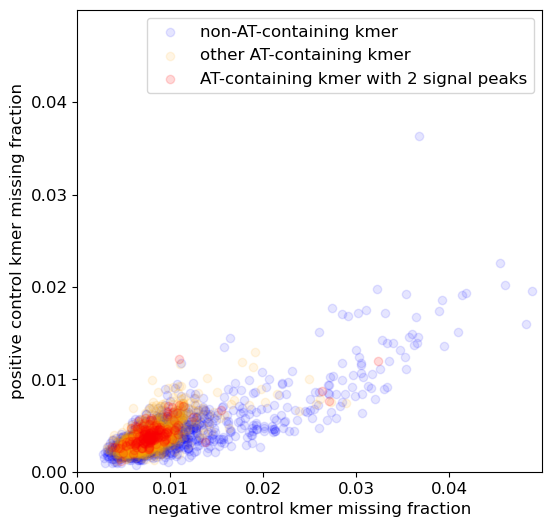

In [29]:
atkmermissingxy, nonatkmermissingxy = [[], []], [[], []]
kmerwith2peaksmissingxy = [[], []]
for kmer in informative_kmers + non_informative_kmers:
    for i in range(2):
        ang = states[i]
        thisfrac = kmerToSampleToMissing[kmer][ang]
        if kmer in informative_kmers:
            kmerwith2peaksmissingxy[i].append(thisfrac)
        elif 'AT' in kmer or 'TA' in kmer:
            atkmermissingxy[i].append(thisfrac)
        else:
            nonatkmermissingxy[i].append(thisfrac)
##plot missingness of AT and non-AT kmers
fig, ax = plt.subplots(figsize=(6, 4))
fig.set_size_inches(6,6)
ax.scatter(nonatkmermissingxy[0], nonatkmermissingxy[1], color='blue', alpha=0.1, label='non-AT-containing kmer')
ax.scatter(atkmermissingxy[0], atkmermissingxy[1], color='orange', alpha=0.1, label='other AT-containing kmer')
ax.scatter(kmerwith2peaksmissingxy[0], kmerwith2peaksmissingxy[1], color='red', alpha=0.15, label='AT-containing kmer with 2 signal peaks')
plt.xlim((0,0.05))
plt.ylim((0,0.05))
ax.set_xticks(np.arange(0, 0.05, 0.01))
ax.set_yticks(np.arange(0, 0.05, 0.01))
plt.xlabel('negative control kmer missing fraction')
plt.ylabel('positive control kmer missing fraction')
plt.legend()
plt.savefig('../figures/Figure_revision_missing_kmer.pdf', dpi=600)

In [ ]:
atkmermissingxy, nonatkmermissingxy = [[], []], [[], []]
kmerwith2peaksmissingxy = [[], []]
for kmer in informative_kmers + non_informative_kmers:
    for i in range(2):
        ang = states[i]
        thisfrac = kmerToSampleToMissing[kmer][ang]
        if kmer in informative_kmers:
            kmerwith2peaksmissingxy[i].append(thisfrac)
        elif 'AT' in kmer or 'TA' in kmer:
            atkmermissingxy[i].append(thisfrac)
        else:
            nonatkmermissingxy[i].append(thisfrac)
##plot missingness of AT and non-AT kmers
fig, ax = plt.subplots(figsize=(6, 4))
fig.set_size_inches(6,6)
ax.scatter(nonatkmermissingxy[0], nonatkmermissingxy[1], color='blue', alpha=0.1, label='non-AT-containing kmer')
ax.scatter(atkmermissingxy[0], atkmermissingxy[1], color='orange', alpha=0.1, label='other AT-containing kmer')
ax.scatter(kmerwith2peaksmissingxy[0], kmerwith2peaksmissingxy[1], color='red', alpha=0.15, label='AT-containing kmer with 2 signal peaks')
plt.xlim((0,0.35))
plt.ylim((0,0.35))
ax.set_xticks([0,0.1,0.2,0.3])
ax.set_yticks([0,0.1,0.2,0.3])
plt.xlabel('negative control kmer missing fraction')
plt.ylabel('positive control kmer missing fraction')
plt.legend()
plt.savefig('../figures/Figure_revision_missing_kmer_original_scale.pdf', dpi=600)

## maximize shared-well positioned genes

In [3]:
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/Saccharomyces_cerevisiae.R64-1-1.109.gtf'

In [175]:
outpath = '../data/revision/'

quantile of spearman cor: [0.16510622 0.31870382 0.45727939]


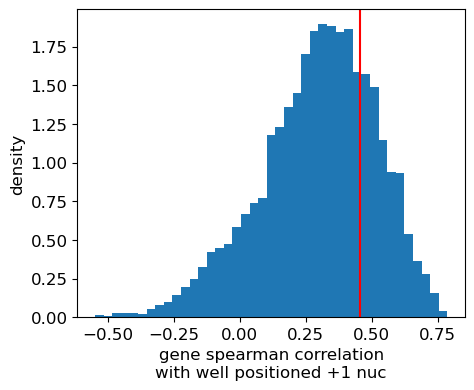

quantile of pearson cor: [0.19248179 0.37005379 0.52101973]


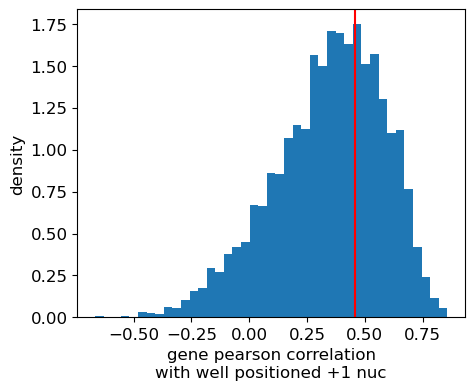

quantile of coverage: [15. 18. 22.]


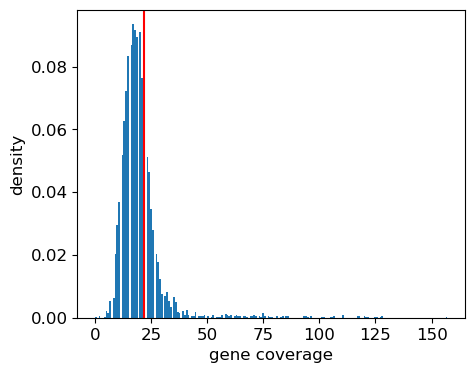

quantile of variation: [5825.  6459.5 7104. ]


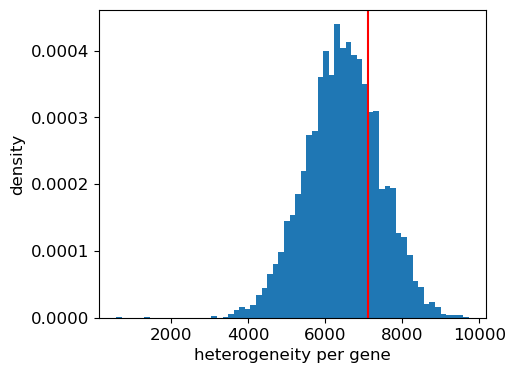

number of genes with good coverage and well positioned tss: 1541


In [240]:
nuclei_chrom_1904 = '../data/prediction/240912_dorado_20190429_chrom.tsv'
genetsspos = '../data/4_dorado_20190429_chrom_well_positioned_genes_score_coverage_window1200.tsv'
prefix = 'Revision2_R4C8_dorado_20190429_chrom'
plotGeneStats(genetsspos, outpath, prefix)
window = 1200
chrom_1904_genes, chrom_1904_regions =filterGeneList(nuclei_chrom_1904, genetsspos, window, outpath, prefix, 
                                                     min_cor=0.5, min_cov=0, max_var=10000, plot_loci=False, gtfFile=gtfFile)

quantile of spearman cor: [0.17952717 0.35000657 0.50033401]


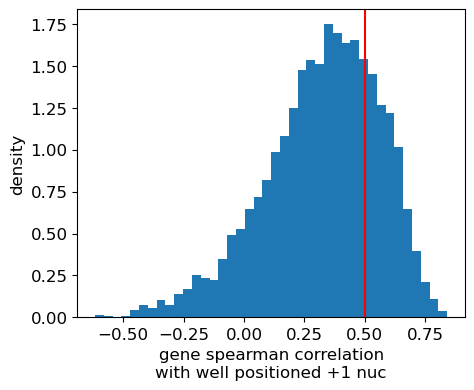

quantile of pearson cor: [0.22448243 0.4148612  0.56533919]


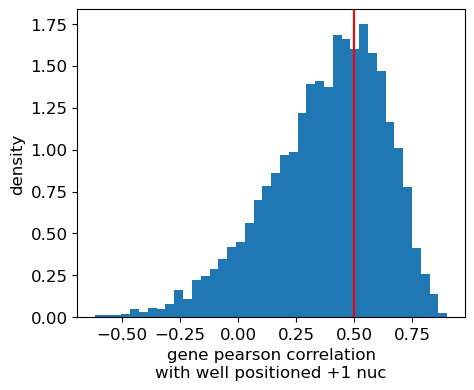

quantile of coverage: [21. 25. 29.]


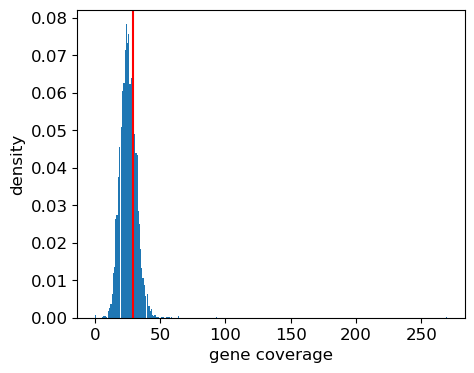

quantile of variation: [8805. 9119. 9401.]


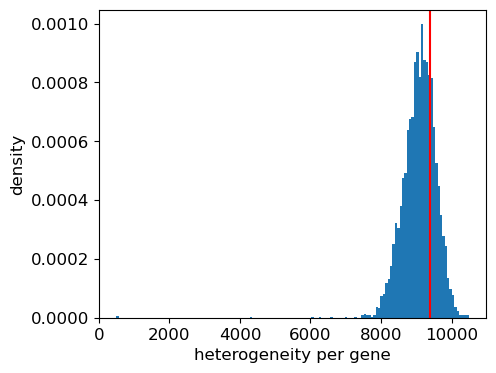

number of genes with good coverage and well positioned tss: 1059


In [241]:
prefix = 'Revision2_R4C8_dorado_20210615_chrom'
nuclei_chrom_2106 = '../data/prediction/240917_dorado_20210615_full.tsv'
genetsspos = '../data/4_dorado_20210615_chrom_well_positioned_genes_score_coverage_window1200.tsv'
plotGeneStats(genetsspos, outpath, prefix)
chrom_2106_genes, chrom_2106_regions = filterGeneList(nuclei_chrom_2106, genetsspos, window, outpath, prefix, 
                                                      min_cor=0.6, min_cov=0, max_var=10000, plot_loci=False, gtfFile=gtfFile)

quantile of spearman cor: [-0.0490285   0.10376529  0.25660425]


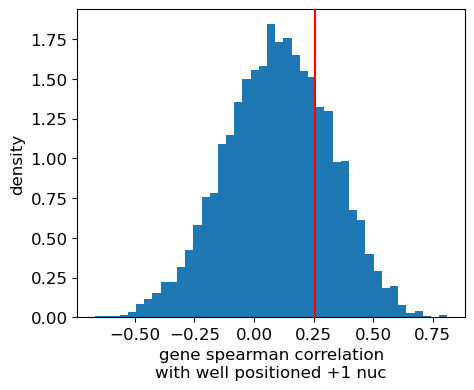

quantile of pearson cor: [-0.04593517  0.11981153  0.28604339]


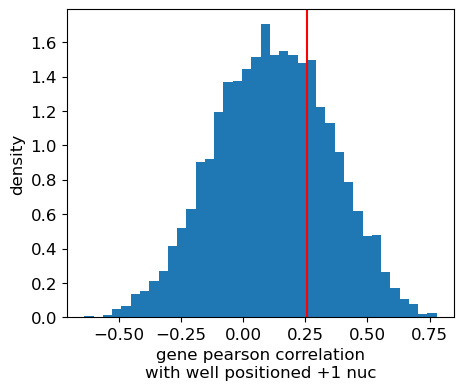

quantile of coverage: [11. 13. 16.]


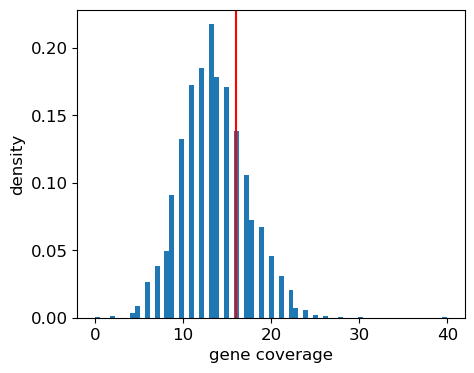

quantile of variation: [4554. 5031. 5501.]


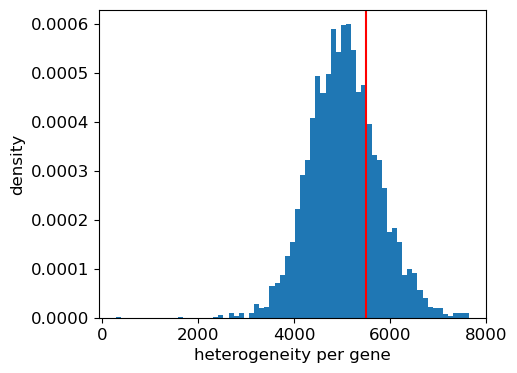

number of genes with good coverage and well positioned tss: 286


In [242]:
prefix = 'Revision2_R4C8_dorado_202205_sphe_chrom'
sphe_chrom = '../data/prediction/240909_dorado_sphe_using_nuclei_model.tsv'
genetsspos = '../data/4_dorado_202205_sphe_chrom__well_positioned_genes_score_coverage_window1200.tsv'
plotGeneStats(genetsspos, outpath, prefix)
chrom_2205_genes, chrom_2205_regions= filterGeneList(sphe_chrom, genetsspos, window, outpath, prefix, 
                                                     min_cor=0.5, min_cov=0, max_var=10000, plot_loci=False, gtfFile=gtfFile)

In [197]:
def jaccard_index(set1, set2):
    intersection = set1 & set2
    print(len(intersection))
    union = set1 | set2
    return len(intersection) / len(union) if union else 0.0

In [243]:
chrom_rep1_genes = set(chrom_1904_genes)
chrom_rep2_genes = set(chrom_2106_genes)
sphe_genes = set(chrom_2205_genes)

In [244]:
print(jaccard_index(chrom_rep1_genes, chrom_rep2_genes))
print(jaccard_index(chrom_rep1_genes, sphe_genes))
print(jaccard_index(chrom_rep2_genes, sphe_genes))

0.3013013013013013
0.07660577489687684
0.07513988808952837


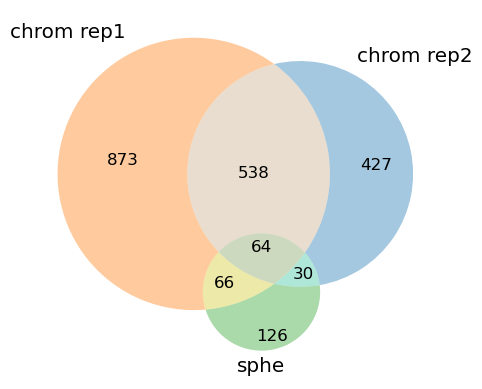

In [245]:
venn3([chrom_rep1_genes, chrom_rep2_genes, sphe_genes], set_labels=('chrom rep1', 'chrom rep2', 'sphe'),  
      set_colors=('tab:orange', 'tab:blue', 'tab:green'))
plt.savefig('../data/revision/Revision2_R4C8_shared_well_positioned_genes_all_3_samples.pdf', bbox_inches='tight')

1541
1059
602


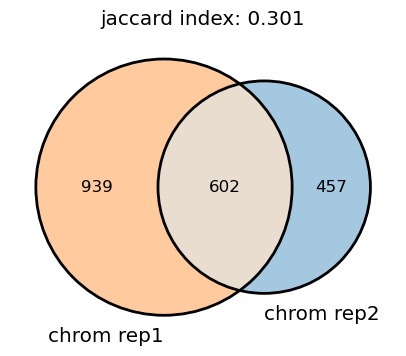

In [199]:
plt.figure(figsize=(6, 4))
chrom_rep1_genes = set(chrom_1904_genes)
print(len(chrom_rep1_genes))
chrom_rep2_genes = set(chrom_2106_genes)
print(len(chrom_2106_genes))
sphe_genes = set(chrom_2205_genes)
venn2([chrom_rep1_genes, chrom_rep2_genes], set_labels=('chrom rep1', 'chrom rep2'),  set_colors=('tab:orange', 'tab:blue'))
venn2_circles([chrom_rep1_genes, chrom_rep2_genes])  
plt.title(f'jaccard index: {round(jaccard_index(chrom_rep1_genes, chrom_rep2_genes), 3)}')   
plt.savefig('../data/revision/Revision2_R4C8_shared_well_positioned_genes.pdf', bbox_inches='tight')

In [72]:
import random

In [246]:
genetsspos = '../data/4_dorado_20190429_chrom_well_positioned_genes_score_coverage_window1200.tsv'
chrom_1904_genes, chrom_1904_regions =filterGeneList(nuclei_chrom_1904, genetsspos, window, outpath, prefix, 
                                                     min_cor=-10, min_cov=0, max_var=12000, plot_loci=False, gtfFile=gtfFile)

genetsspos = '../data/4_dorado_20210615_chrom_well_positioned_genes_score_coverage_window1200.tsv'
chrom_2205_genes, chrom_2205_regions= filterGeneList(sphe_chrom, genetsspos, window, outpath, prefix, 
                                                     min_cor=-10, min_cov=0, max_var=15000, plot_loci=False, gtfFile=gtfFile)

def jaccard_index(set1, set2):
    intersection = set1 & set2
    union = set1 | set2
    return len(intersection) / len(union) if union else 0.0

jcs = []
for i in range(5000):
    rep1_sample = set(random.sample(chrom_1904_genes, 1541))
    rep2_sample = set(random.sample(chrom_2205_genes, 1059))
    jc = jaccard_index(rep1_sample, rep2_sample)
    jcs.append(jc)

number of genes with good coverage and well positioned tss: 5440
number of genes with good coverage and well positioned tss: 5440


In [219]:
from scipy.stats import norm
from scipy.stats import gaussian_kde

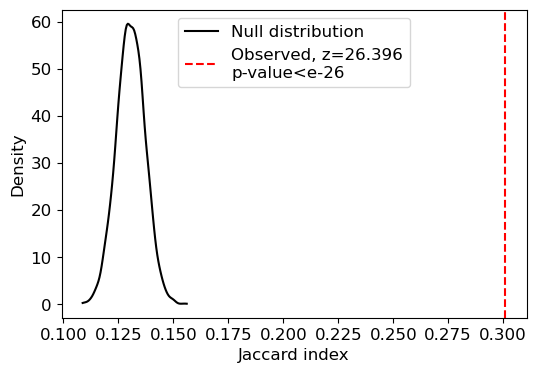

In [247]:
plt.figure(figsize=(6, 4))
jcs = np.array(jcs)
kde = gaussian_kde(jcs)
x_vals = np.linspace(min(jcs), max(jcs), 100)
y_vals = kde(x_vals)
plt.plot(x_vals, y_vals, color='black', label='Null distribution')
plt.ylabel('Density')
std = np.std(jcs)
z = (0.301-np.mean(jcs))/std
pval = round(2*(1-norm.cdf(abs(z))), 4)
plt.axvline(x = 0.301, color = 'red', linestyle='--', label = f'Observed, z={round(z, 3)}\np-value<e-26')
plt.legend(loc='upper center')
plt.xlabel('Jaccard index')

plt.savefig('../data/revision/Revision2_R4C8_shared_well_positioned_genes_permutation.pdf', bbox_inches='tight')

## RDN locus

In [249]:
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/Saccharomyces_cerevisiae.R64-1-1.109.gtf'

all_genes = {'rdn': 'chrXII:451445-468622', 'rdn_left': 'chrXII:451445-460034', 'rdn_right': 'chrXII:460034-468622'}

In [263]:
fig_outpath = '../data/revision/'

In [255]:
labels = ['dorado_20190429_chrom', 'dorado_20210615_chrom', 'dorado_202205_sphe_chrom']
chrom_190429_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240912_dorado_20190429_chrom.tsv'
chrom_210615_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240917_dorado_20210615_full.tsv'
chrom_sphe_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model.tsv'
all_chrom = [chrom_190429_pred, chrom_210615_pred, chrom_sphe_pred]

plotting rdn_left with Revision2_R4C2dorado_202205_sphe_chrom ...
preprocessing input matrix...
number of reads before filtering: 365
number of reads kept: 102
filtering hyper-methylated reads...
number of reads kept: 101
writing output to file:  ../figures/Revision2_R4C2dorado_202205_sphe_chrom_rdn_left_chrXII:451445-460034.mtx
running hierarchical clustering...
Clustering with number of clusters = 4
plotting gene annotations...
plotting rdn_right with Revision2_R4C2dorado_202205_sphe_chrom ...
preprocessing input matrix...
number of reads before filtering: 377
number of reads kept: 124
filtering hyper-methylated reads...
number of reads kept: 122
writing output to file:  ../figures/Revision2_R4C2dorado_202205_sphe_chrom_rdn_right_chrXII:460034-468622.mtx
running hierarchical clustering...
Clustering with number of clusters = 4
plotting gene annotations...


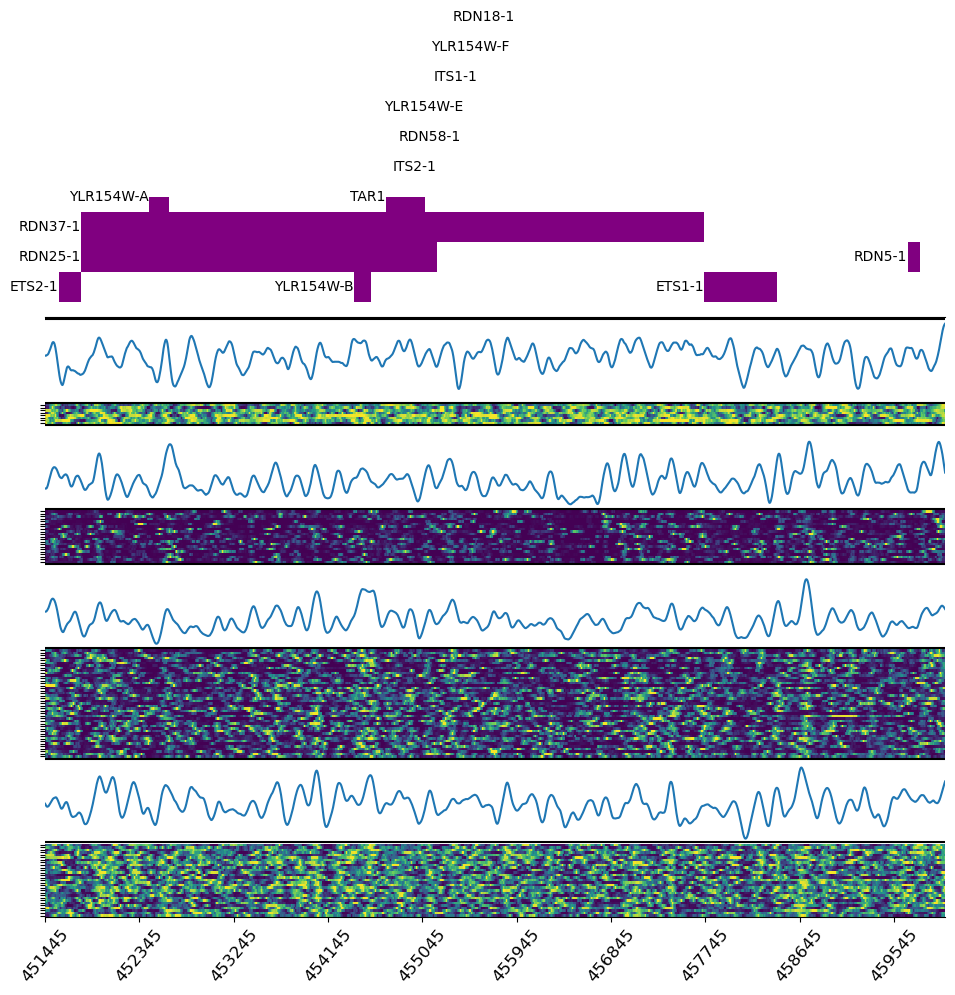

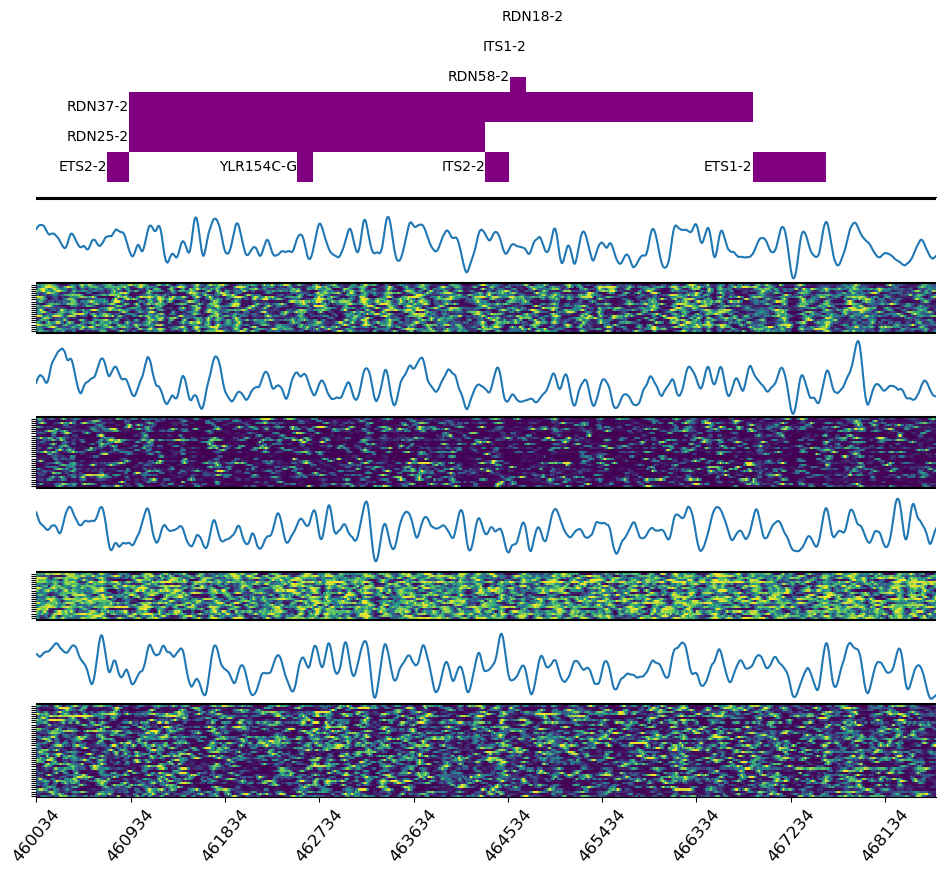

In [257]:
for geneid in all_genes:
    if geneid == 'rdn': continue
    for i in range(len(all_chrom)):
        if i != 2: continue
        predfile = all_chrom[i]
        prefix = f'Revision2_R4C2{labels[i]}'
        print(f'plotting {geneid} with {prefix} ...')
        plotModTrack(predfile, all_genes[geneid], ncluster=4, outpath=fig_outpath, prefix= f'{prefix}_{geneid}', 
                     figsize=(10,8), gtfFile=gtfFile, xticks_space = 900, na_thred=0, max_meth = 256)

## plot other sphe good coverage genes in nuc rep1 and rep2

In [275]:
all_genes = {'zz-YHR054C': 'chrVIII:213642-214842', 'GDI1': 'chrV:438896-440096', 'APS3': 'chrX:395971-397171', 
             'RPL21B':'chrXVI:406029-407229', 'GSF2':'chrXIII:177824-179024'}

plotting RPL21B with Revision2_R4C2dorado_20190429_chrom ...
preprocessing input matrix...
number of reads before filtering: 26
number of reads kept: 19
filtering hyper-methylated reads...
number of reads kept: 18
writing output to file:  ../data/revision/Revision2_R4C2dorado_20190429_chrom_RPL21B_chrXVI:406029-407229.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...
plotting RPL21B with Revision2_R4C2dorado_20210615_chrom ...
preprocessing input matrix...
number of reads before filtering: 166
number of reads kept: 31
filtering hyper-methylated reads...
number of reads kept: 28
writing output to file:  ../data/revision/Revision2_R4C2dorado_20210615_chrom_RPL21B_chrXVI:406029-407229.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...
plotting RPL21B with Revision2_R4C2dorado_202205_sphe_chrom ...
preprocessing input matrix...
number 

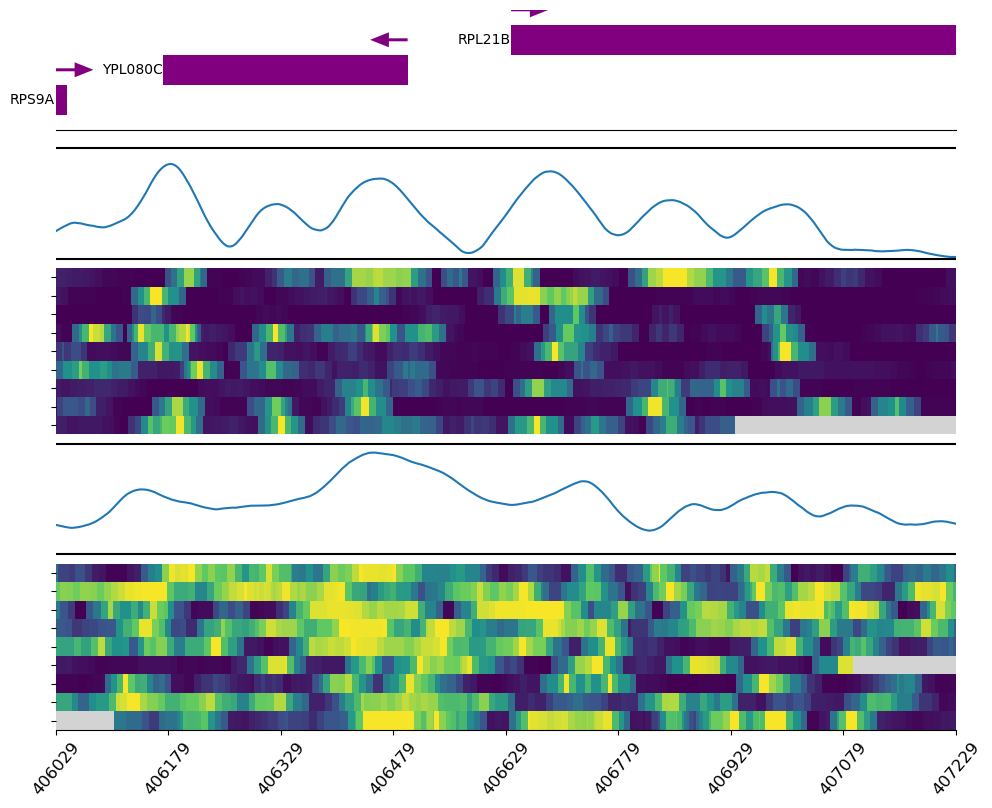

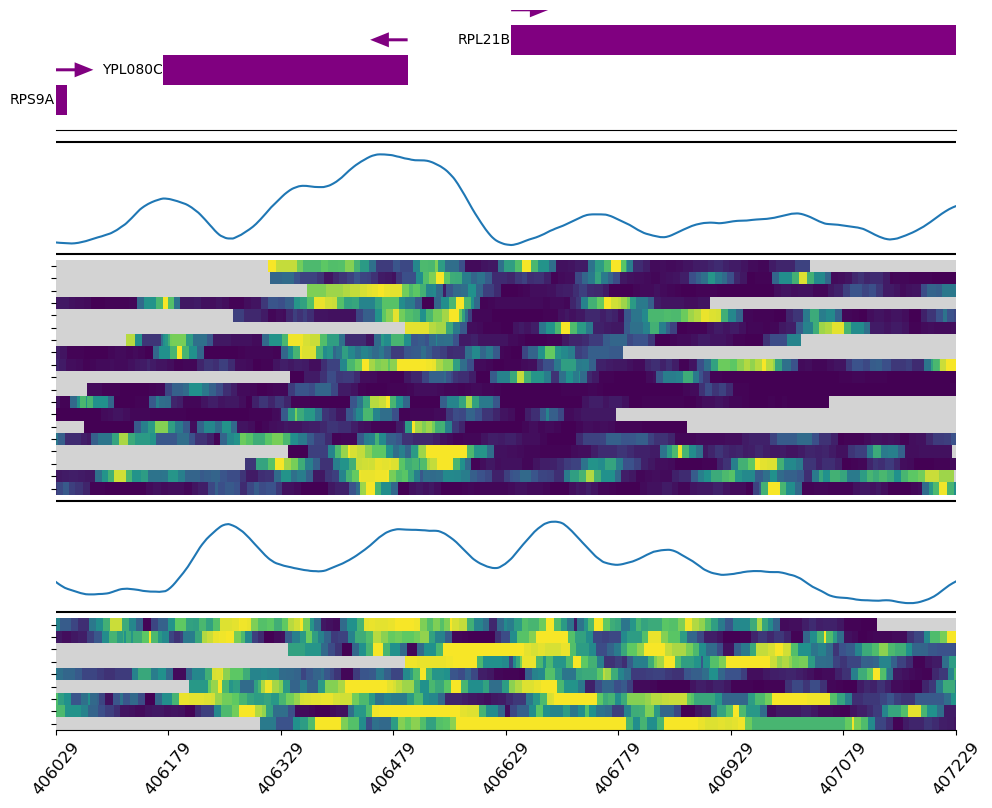

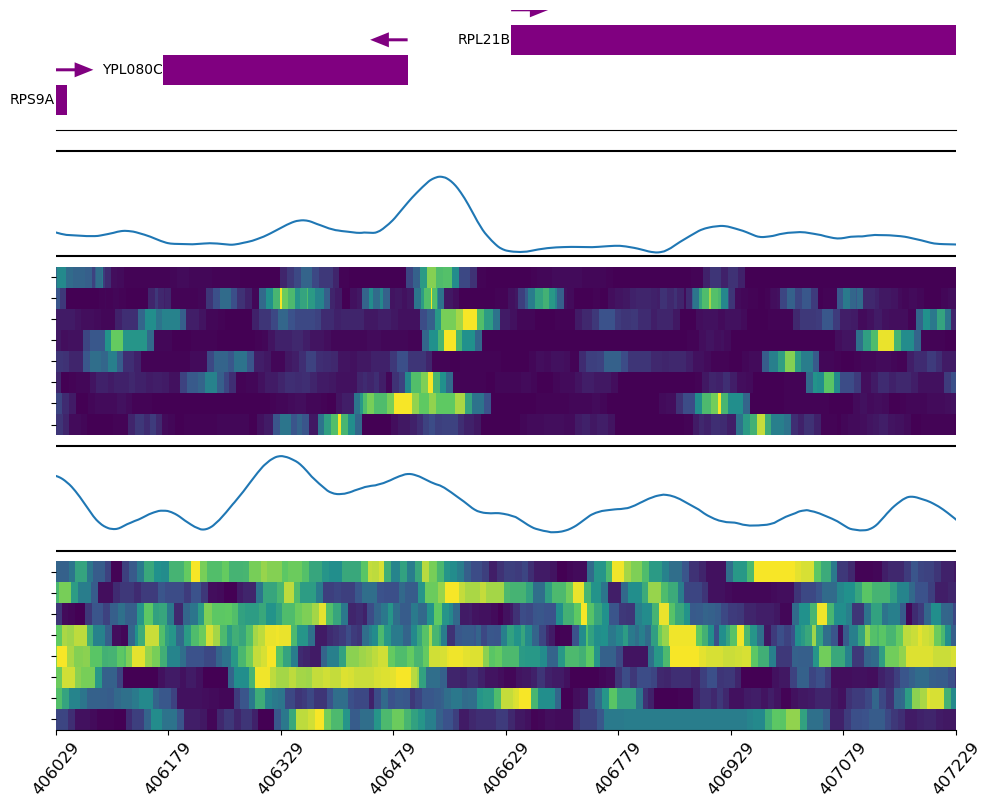

In [272]:
all_genes = {}
for geneid in all_genes:
    for i in range(len(all_chrom)):
        predfile = all_chrom[i]
        prefix = f'Revision2_R4C2{labels[i]}'
        print(f'plotting {geneid} with {prefix} ...')
        plotModTrack(predfile, all_genes[geneid], ncluster=2, outpath=fig_outpath, prefix= f'{prefix}_{geneid}', 
                     figsize=(10,8), gtfFile=gtfFile, xticks_space = 150, na_thred=0.4, max_meth = 200)

plotting rdn_left with Revision2_R4C2dorado_20210615_chrom ...
preprocessing input matrix...
number of reads before filtering: 54638
number of reads kept: 129
filtering hyper-methylated reads...
number of reads kept: 47
writing output to file:  ../data/revision/Revision2_R4C2dorado_20210615_chrom_rdn_left_chrXII:451445-460034.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 4
plotting gene annotations...


/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:143: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)
/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:197: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)


plotting rdn_right with Revision2_R4C2dorado_20210615_chrom ...
preprocessing input matrix...
number of reads before filtering: 57882
number of reads kept: 131
filtering hyper-methylated reads...
number of reads kept: 49
writing output to file:  ../data/revision/Revision2_R4C2dorado_20210615_chrom_rdn_right_chrXII:460034-468622.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 4
plotting gene annotations...


/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:143: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)


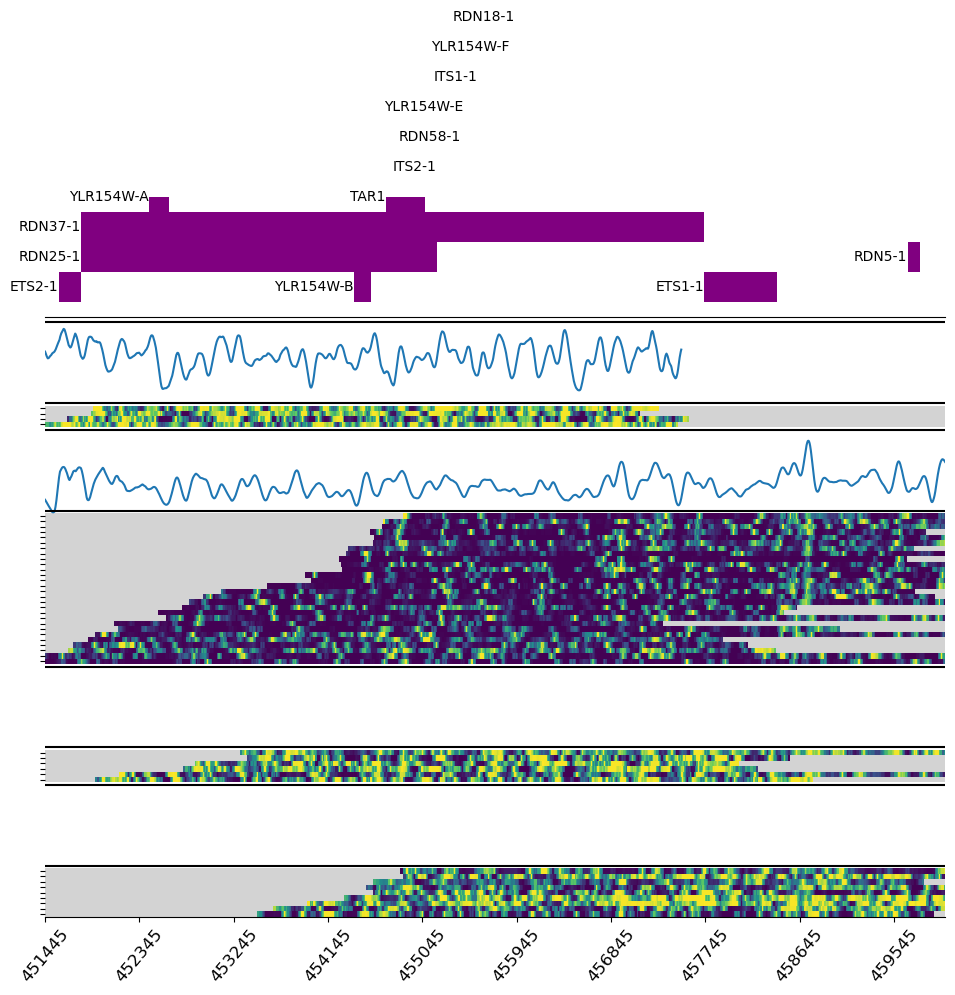

In [ ]:
all_genes = {'rdn': 'chrXII:451445-468622', 'rdn_left': 'chrXII:451445-460034', 'rdn_right': 'chrXII:460034-468622'}
for geneid in all_genes:
    if geneid == 'rdn': continue
    for i in range(len(all_chrom)):
        if i != 1: continue
        predfile = all_chrom[i]
        prefix = f'Revision2_R4C2{labels[i]}'
        print(f'plotting {geneid} with {prefix} ...')
        plotModTrack(predfile, all_genes[geneid], ncluster=4, outpath=fig_outpath, prefix= f'{prefix}_{geneid}', 
                     figsize=(10,8), gtfFile=gtfFile, xticks_space = 900, na_thred=0.4, max_meth = 256)